# Keener's study

Esse notebook serve para compreensão e testes do modelo Keenerss

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import regex as re

In [2]:
data = pd.read_excel('../data/final_data.xlsx')

# choose class
data = data[data['Classe Vela'] == '49erFX']

In [3]:
# get competition years using regex
for competition in data['Nome Competição']:
    data.loc[data['Nome Competição'] == competition, 'Ano'] = re.findall(r'\d{4}', competition)[0]

In [4]:
# create dictionary to map competitor names to unique indices
competitor_to_index = {competitor: idx for idx, competitor in enumerate(data['Nome Competidor'].unique())}

# create matrix of size (n_players, n_players) with zeros
n_players = len(competitor_to_index)
matrix_alpha = np.zeros((n_players, n_players))
matrix_beta = np.zeros((n_players, n_players))

# iterate through competitions
for competition in data['Nome Competição'].unique():
    year = int(data[data['Nome Competição'] == competition]['Ano'].values[0])

    # get data for this competition
    data_competition = data[data['Nome Competição'] == competition]
    data_competition = data_competition.drop_duplicates(subset='Nome Competidor', keep='first')

    # get list of competitors in this competition
    competitors = data_competition['Nome Competidor'].unique()
    # get number of competitors in this competition
    n_players = len(competitors)
    
    # iterate through competitors in this competition setting (i, j) = 1 if i beats j in this competition
    # get i and j from the dictionary
    for i in range(n_players):
        for j in range(n_players):
            competitor_i = competitors[i]
            competitor_j = competitors[j]
            posicao_i = data_competition[(data_competition['Nome Competidor'] == competitor_i)]['Posição Geral'].values[0]
            posicao_j = data_competition[(data_competition['Nome Competidor'] == competitor_j)]['Posição Geral'].values[0]
            pontuacao_i = data_competition[(data_competition['Nome Competidor'] == competitor_i)]['Pontuação Total'].values[0]
            pontuacao_j = data_competition[(data_competition['Nome Competidor'] == competitor_j)]['Pontuação Total'].values[0]

            # get index of competitor i and j in the matrix
            index_i = competitor_to_index[competitor_i]
            index_j = competitor_to_index[competitor_j]

            if posicao_i < posicao_j:
                if year >= 2021:
                    # update the cumulative matrix
                    matrix_alpha[index_i][index_j] += 1
                    # update matrix beta with difference in points
                    matrix_beta[index_i][index_j] += pontuacao_j/(pontuacao_i + pontuacao_j)
                # elif year >= 2016:
                #     # update the cumulative matrix
                #     matrix_alpha[index_i][index_j] += 0.8
                #     # update matrix beta with difference in points
                #     matrix_beta[index_i][index_j] += 0.8*(pontuacao_j/(pontuacao_i + pontuacao_j))
                # else:
                #     # update the cumulative matrix
                #     matrix_alpha[index_i][index_j] += 0.6
                #     # update matrix beta with difference in points
                #     matrix_beta[index_i][index_j] += 0.6*(pontuacao_j/(pontuacao_i + pontuacao_j))

In [ ]:
# get w, winning percentage for each competitor
w = np.sum(matrix_alpha, axis=1)/(np.sum(matrix_alpha, axis=1) + np.sum(matrix_alpha, axis=0))

In [5]:
#checking results
write_matrix = pd.DataFrame(matrix_alpha)

# columns and index are the names of the competitors
write_matrix.columns = competitor_to_index.keys()
write_matrix.index = competitor_to_index.keys()
write_matrix

,"MARTINE GRAEL, KAHENA KUNZE","IDA MARIE BAAD NIELSEN, MARIE THUSGAARD OLSEN","HANNA KLINGA, LISA ORN","ODILE VAN AANHOLT, ANNETTE DUETZ","MAIKEN FOGHT SCHUTT, ANNE-JULIE SCHUTT","ANNEMIEK BEKKERING, ANNETTE DUETZ","ANIKA LORENZ, VICTORIA JURCZOK","ODILE VAN AANHOLT, ELISE RUYTER","VILMA BOBECK, REBECCA NETZLER","RAGNA AGERUP, MAIA AGERUP",...,"MARINA TARAN, ANGELINA MARKOVA","YANG YIN, SHI SHIQING","GUO FAN, ZHOU YAN","ANASTASIA VORONKOVA, OLGA KNIPOVICH","MENGMENG ZHANG, XIAOYA SU","KATE SHANER, KATHLEEN LOVE","HUIJIA YU, YE JIN","KAMONCHANOK KLAHAN, NICHAPA WAIWAI","SHASHA CHEN, NANA HU","TINA LUTZ, LOTTA WIEMERS"
"MARTINE GRAEL, KAHENA KUNZE",0.0,4.6,2.0,2.0,1.2,2.8,5.8,0.0,3.0,3.4,...,0.0,0.0,0.0,0.0,0.8,0.8,0.8,0.8,0.8,0.0
"IDA MARIE BAAD NIELSEN, MARIE THUSGAARD OLSEN",1.2,0.0,2.0,0.0,1.2,2.8,5.0,0.0,0.0,4.2,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.0
"HANNA KLINGA, LISA ORN",0.8,0.0,0.0,0.0,0.6,0.8,2.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"ODILE VAN AANHOLT, ANNETTE DUETZ",4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"MAIKEN FOGHT SCHUTT, ANNE-JULIE SCHUTT",1.4,1.4,1.4,0.0,0.0,2.0,2.6,0.0,0.0,2.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"KATE SHANER, KATHLEEN LOVE",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.8,0.8,0.8,0.0
"HUIJIA YU, YE JIN",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,0.8,0.0
"KAMONCHANOK KLAHAN, NICHAPA WAIWAI",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,0.0
"SHASHA CHEN, NANA HU",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# making W singular

# W = matrix_alpha
W = matrix_alpha

# add some perturbation to the matrix
perturbed_W = W + 0.00001 * np.ones(W.shape)

# define digraph W
G = nx.DiGraph(perturbed_W)

# check if G is strongly connected
nx.is_strongly_connected(G)

True

In [110]:
# # draw the graph 15x10
# # make the dots small
# # make the edges thin

# plt.figure(figsize=(15,10))
# nx.draw(G, node_size=30, width=0.1)


In [7]:
# Keener's ranking

# get d vector, d=(W + W^T)1, where 1 is a vector of ones 
d = np.dot(perturbed_W + perturbed_W.T, np.ones(perturbed_W.shape[0]))

# get D matrix, D = diag(d)
# we'll use D to normalize the matrix by the number of competitions each competitor was in
D = np.diag(d)

# perron frobeniun eigenvector of D^-1 W
eigenvalues, eigenvectors = np.linalg.eig(np.dot(np.linalg.inv(D), perturbed_W))
# absolute value of eigenvalues
eigenvalues = np.abs(eigenvalues)
idx = np.argmax(eigenvalues)
eigenvector = eigenvectors[idx]

# absolute value of eigenvector
eigenvector = np.abs(eigenvector)

# get the ranking
ranking = pd.DataFrame(eigenvector, index=competitor_to_index.keys(), columns=['rating'])
ranking = ranking.sort_values(by='rating', ascending=False)
ranking

,rating
"MARTINE GRAEL, KAHENA KUNZE",1.428860e-01
"ANIKA LORENZ, VICTORIA JURCZOK",1.016393e-01
"ODILE VAN AANHOLT, ELISE RUYTER",1.016393e-01
"ODILE VAN AANHOLT, ANNETTE DUETZ",1.007683e-01
"PATRICIA SUAREZ, MARIA CANTERO",9.627254e-02
...,...
"GUO FAN, ZHOU YAN",4.154276e-03
"ELIN SEVEDAG, KLARA JOHANSSON",2.838336e-03
"HUIJIA YU, YE JIN",5.929873e-04
"CLARA SCHEIWILLER, VIOLETTE LEMERCIER",2.114972e-04


In [14]:
# create A matrix with a column of ones and a column of the ranking
A = np.ones((len(ranking), 2))
A[:, 1] = ranking['rating'].values

import numpy as np
from scipy.optimize import minimize

# Define the objective function (squared norm of the residual)
def objective_function(x, A, w):
    return np.linalg.norm(A.dot(x) - w)**2

# Define the constraint function (A^TAx - A^Tw = 0)
def constraint_function(x, A, w):
    return A.T.dot(A.dot(x) - w)

# Define the Jacobian of the constraint function (transpose of A^TA)
def constraint_jacobian(x, A, w):
    return 2 * A.T.dot(A)

# Set up the initial guess and constraints
x0 = np.zeros(A.shape[1])  # Initial guess
constraints = {'type': 'eq', 'fun': constraint_function, 'jac': constraint_jacobian, 'args': (A, w)}

# Minimize the objective function subject to the constraint
result = minimize(objective_function, x0, args=(A, w), constraints=constraints)

# The optimal solution
optimal_x = result.x

# Print the result
print("Optimal solution x:", optimal_x)


NameError: name 'w' is not defined

In [8]:
# add column with row number
ranking['ranking'] = ranking.reset_index().index + 1

# round rating to 4 decimal places
ranking['rating'] = ranking['rating'].round(4)


In [9]:
# output each line of the ranking to a csv file in the format
# ranking, competitor, rating
for index, row in ranking.iterrows():
    print(str(int(row['ranking'])) + ', ' + index + ', ' + str(row['rating']))

1, MARTINE GRAEL, KAHENA KUNZE, 0.1429
2, ANIKA LORENZ, VICTORIA JURCZOK, 0.1016
3, ODILE VAN AANHOLT, ELISE RUYTER, 0.1016
4, ODILE VAN AANHOLT, ANNETTE DUETZ, 0.1008
5, PATRICIA SUAREZ, MARIA CANTERO, 0.0963
6, FREYA BLACK, SASKIA TIDEY, 0.0963
7, JOHANNE SCHMIDT, ANDREA SCHMIDT, 0.0931
8, NATSUMI ANDO, FENJA VALENTIEN, 0.0927
9, PAULA VAN WIERINGEN, ELENA BARRIO GARCIA, 0.0927
10, VILMA BOBECK, EBBA BERNTSSON, 0.0925
11, FRANCESCA CLAPCICH, GIULIA CONTI, 0.0915
12, ALEXANDRA MALONEY, MOLLY MEECH, 0.0915
13, CHARLOTTE DOBSON, SASKIA TIDEY, 0.0901
14, SOPHIE WEGUELIN, SOPHIE AINSWORTH, 0.0865
15, OLIVIA PRICE, EVIE HASELDINE, 0.0865
16, CLAUDIA SOBRAL LUSQUINOS, CARLOTA GARCIA FERNANDEZ, 0.0807
17, VERA TER HORST, JORIEN HIN, 0.0807
18, HANNA KLINGA, LISA ORN, 0.0749
19, MAIKEN FOGHT SCHUTT, ANNE-JULIE SCHUTT, 0.0741
20, ANNEMIEK BEKKERING, ANNETTE DUETZ, 0.0741
21, MINA FERGUSON, MADDY MCLEAY, 0.0711
22, LENA SIEMANN, JILL PALAND, 0.0711
23, SOPHIE MOSEGAARD, FIONA SCHARER, 0.0668
24

In [12]:
ranking.to_excel('keeners_alpha_time_49erFX.xlsx')

In [29]:
matrix_beta = np.nan_to_num(matrix_beta)
S = matrix_beta

# add some perturbation to the matrix
perturbed_S = S + 0.0001*np.ones(S.shape)

# define digraph S
G = nx.DiGraph(perturbed_S)

# check if G is strongly connected
nx.is_strongly_connected(G)

True

In [30]:
#checking results
write_matrix = pd.DataFrame(perturbed_S)

# columns and index are the names of the competitors
write_matrix.columns = competitor_to_index.keys()
write_matrix.index = competitor_to_index.keys()
write_matrix

,"MARTINE GRAEL, KAHENA KUNZE","IDA MARIE BAAD NIELSEN, MARIE THUSGAARD OLSEN","HANNA KLINGA, LISA ORN","ODILE VAN AANHOLT, ANNETTE DUETZ","MAIKEN FOGHT SCHUTT, ANNE-JULIE SCHUTT","ANNEMIEK BEKKERING, ANNETTE DUETZ","ANIKA LORENZ, VICTORIA JURCZOK","ODILE VAN AANHOLT, ELISE RUYTER","VILMA BOBECK, REBECCA NETZLER","RAGNA AGERUP, MAIA AGERUP",...,"MARINA TARAN, ANGELINA MARKOVA","YANG YIN, SHI SHIQING","GUO FAN, ZHOU YAN","ANASTASIA VORONKOVA, OLGA KNIPOVICH","MENGMENG ZHANG, XIAOYA SU","KATE SHANER, KATHLEEN LOVE","HUIJIA YU, YE JIN","KAMONCHANOK KLAHAN, NICHAPA WAIWAI","SHASHA CHEN, NANA HU","TINA LUTZ, LOTTA WIEMERS"
"MARTINE GRAEL, KAHENA KUNZE",0.000100,3.308737,1.739467,1.110976,1.173507,2.422137,4.956843,0.0001,1.660653,2.928177,...,0.0001,0.0001,0.0001,0.0001,0.705457,0.735040,0.738195,0.748192,0.788562,0.0001
"IDA MARIE BAAD NIELSEN, MARIE THUSGAARD OLSEN",1.003315,0.000100,1.670515,0.000100,1.129385,2.401647,4.199185,0.0001,0.000100,0.000100,...,0.0001,0.0001,0.0001,0.0001,0.681134,0.712162,0.715485,0.726026,0.768850,0.0001
"HANNA KLINGA, LISA ORN",0.475510,0.000100,0.000100,0.000100,0.507699,0.494837,1.792785,0.0001,0.000100,1.512820,...,0.0001,0.0001,0.0001,0.0001,0.000100,0.000100,0.000100,0.000100,0.000100,0.0001
"ODILE VAN AANHOLT, ANNETTE DUETZ",2.461233,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.0001,1.661751,0.000100,...,0.0001,0.0001,0.0001,0.0001,0.000100,0.000100,0.000100,0.000100,0.000100,0.0001
"MAIKEN FOGHT SCHUTT, ANNE-JULIE SCHUTT",1.116945,1.180223,1.259419,0.000100,0.000100,1.600241,2.355507,0.0001,0.000100,2.352533,...,0.0001,0.0001,0.0001,0.0001,0.000100,0.000100,0.000100,0.000100,0.000100,0.0001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"KATE SHANER, KATHLEEN LOVE",0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.0001,0.000100,0.000100,...,0.0001,0.0001,0.0001,0.0001,0.000100,0.000100,0.504165,0.517250,0.573527,0.0001
"HUIJIA YU, YE JIN",0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.0001,0.000100,0.000100,...,0.0001,0.0001,0.0001,0.0001,0.000100,0.000100,0.000100,0.513189,0.569544,0.0001
"KAMONCHANOK KLAHAN, NICHAPA WAIWAI",0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.0001,0.000100,0.000100,...,0.0001,0.0001,0.0001,0.0001,0.000100,0.000100,0.000100,0.000100,0.556661,0.0001
"SHASHA CHEN, NANA HU",0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.0001,0.000100,0.000100,...,0.0001,0.0001,0.0001,0.0001,0.000100,0.000100,0.000100,0.000100,0.000100,0.0001


In [ ]:
# check if perturbed_S is positive
np.all(perturbed_S >= 0)

In [52]:
# keener's ranking with beta matrix

# get d vector, d=(S + S^T)1, where 1 is a vector of ones
d = np.dot(perturbed_S + perturbed_S.T, np.ones(perturbed_S.shape[0]))

# get D matrix, D = diag(d)
D = np.diag(d)

# create empty K matrix with same size as matrix_beta
K = np.zeros(perturbed_S.shape)

# for entry (i, j) in beta matrix, define h = ((i, j) + 1)/((i, j) + (j, i) + 2)
for i in range(n_players):
    for j in range(n_players):
        x = (perturbed_S[i][j] + 1)/(perturbed_S[i][j] + perturbed_S[j][i] + 2)
        h = 1/2 + 1/2 * np.sign(x - 1/2) * np.sqrt(abs(2*x - 1))
        K[i][j] = h

# perron frobenius eigenvector of D^-1 K
eigenvalues, eigenvectors = np.linalg.eig(np.dot(np.linalg.inv(D), K))
idx = np.argmax(eigenvalues)
eigenvector = eigenvectors[idx]

# get the ranking
ranking = pd.DataFrame(eigenvector, index=competitor_to_index.keys(), columns=['rating'])
ranking = ranking.sort_values(by='rating', ascending=False)
ranking

,rating
"VICTORIA TRAVASCIO, MARIA SOL BRANZ",0.096956+0.055498j
"JULIA GROSS, HANNA KLINGA",0.096956-0.055498j
"FREYA BLACK, SASKIA TIDEY",0.090775+0.102687j
"PATRICIA SUAREZ, MARIA CANTERO",0.090775-0.102687j
"KLARA WESTER, REBECCA NETZLER",0.058299+0.032524j
...,...
"NATASHA BRYANT, ANNIE WILMOT",-0.087379+0.031166j
"ALEXANDRA TEN HOVE, MARIAH MILLEN",-0.087379-0.031166j
"JOHANNE SCHMIDT, ANDREA SCHMIDT",-0.109135+0.000000j
"TESS LLOYD, CAITLIN ELKS",-0.139659+0.145250j


In [53]:
# add column with row number
ranking['ranking'] = ranking.reset_index().index + 1

# round rating to 4 decimal 
ranking['rating'] = ranking['rating'].round(4)

In [38]:
# output each line of the ranking to a csv file in the format
# ranking, competitor, rating
for index, row in ranking.iterrows():
    print(str(int(row['ranking'])) + ', ' + index + ', ' + str(row['rating']))

1, VICTORIA TRAVASCIO, MARIA SOL BRANZ, (0.097+0.0555j)
2, JULIA GROSS, HANNA KLINGA, (0.097-0.0555j)
3, FREYA BLACK, SASKIA TIDEY, (0.0908+0.1027j)
4, PATRICIA SUAREZ, MARIA CANTERO, (0.0908-0.1027j)
5, KLARA WESTER, REBECCA NETZLER, (0.0583+0.0325j)
6, ISAURA MAENHAUT, ANOUK GEURTS, (0.0583-0.0325j)
7, HANNA WILLE, MARLA BERGMANN, (0.0445+0.0219j)
8, LARA GRANIER, AMELIE RIOU, (0.0445-0.0219j)
9, RONJA GRONBLOM, VEERA HOKKA, (0.0433+0.0717j)
10, ALEKSANDRA MELZACKA, SANDRA JANKOWIAK, (0.0433-0.0717j)
11, ANNEMIEK BEKKERING, ANNETTE DUETZ, (0.0381+0.0101j)
12, ANIKA LORENZ, VICTORIA JURCZOK, (0.0381-0.0101j)
13, TAMARA ECHEGOYEN, PAULA BARCELO, (0.0349+0.0149j)
14, MARIA SOL BRANZ, CECILIA CARRANZA SAROLI, (0.0349-0.0149j)
15, ANNA YAMAZAKI, SENA TAKANO, (0.025+0.0101j)
16, HELENE NAESS, MARIE RONNINGEN, (0.025-0.0101j)
17, MARTINE GRAEL, KAHENA KUNZE, (0.0145+0j)
18, GIORGIA BERTUZZI, JANA GERMANI, (0.0053+0.0207j)
19, STEPHANIE ROBLE, MAGGIE SHEA, (0.0053-0.0207j)
20, MARIANNE DE VR

C:\Users\Carol Erthal\AppData\Local\Temp\ipykernel_1984\3260809923.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  print(str(int(row['ranking'])) + ', ' + index + ', ' + str(row['rating']))


In [54]:
ranking.to_excel('keeners_beta_49erFX.xlsx')

In [11]:
# maximum a posteriori ranking

# n = number of competitors
n = matrix_alpha.shape[0]

prior_mean = 0
prior_var = 1

posterior_mean = np.zeros(n)
posterior_var = np.zeros(n)

# iterate through competitors
for i in range(n):
    # likelihood mean
    likelihood_mean = np.sum(matrix_alpha[i])/(n-1)
    # likelihood variance
    likelihood_var = np.var(matrix_alpha[i])

    # posterior mean
    posterior_mean[i] = (likelihood_var * prior_mean + prior_var * likelihood_mean)/(prior_var + likelihood_var)
    # posterior variance
    posterior_var[i] = 1/(1/prior_var + 1/likelihood_var)

# get the ranking
ranking = pd.DataFrame(posterior_mean, index=competitor_to_index.keys(), columns=['ranking'])
ranking = ranking.sort_values(by='ranking', ascending=False)


C:\Users\Carol Erthal\AppData\Local\Temp\ipykernel_3884\1816485200.py:22: RuntimeWarning: divide by zero encountered in double_scalars
  posterior_var[i] = 1/(1/prior_var + 1/likelihood_var)


In [12]:
ranking.head(30)

,ranking
Emma WILSON,0.962177
Shahar TIBI,0.920791
Sharon KANTOR,0.897159
Marta MAGGETTI,0.877488
Katy SPYCHAKOV,0.864681
Sara WENNEKES,0.862398
Maja DZIARNOWSKA,0.849109
Islay WATSON,0.834292
Veerle TEN HAVE,0.817533
Lola SORIN,0.810311


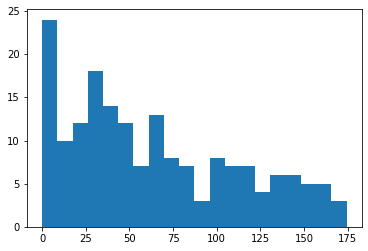

In [13]:
# sum line by line of matrix alpha and show histogram
sum = np.sum(matrix_alpha, axis=1)

# histogram of sum
import matplotlib.pyplot as plt
plt.hist(sum, bins=20)
plt.show()

In [15]:
# get mean and variance of sum
mean = np.mean(sum)
var = np.var(sum)

print(mean, var)

64.41340782122904 2354.23391085727


In [ ]:
# maximum a posteriori ranking
# for exponential prior

# n = number of competitors
n = matrix_alpha.shape[0]

prior_mean = 64
prior_var = 2354

posterior_mean = np.zeros(n)
posterior_var = np.zeros(n)

# iterate through competitors
for i in range(n):
    # likelihood mean
    likelihood_mean = np.sum(matrix_alpha[i])/(n-1)
    # likelihood variance
    likelihood_var = np.var(matrix_alpha[i])

    # posterior mean
    posterior_mean[i] = (likelihood_var * prior_mean + prior_var * likelihood_mean)/(prior_var + likelihood_var)
    # posterior variance
    posterior_var[i] = 1/(1/prior_var + 1/likelihood_var)

# get the ranking
ranking = pd.DataFrame(posterior_mean, index=competitor_to_index.keys(), columns=['ranking'])
ranking = ranking.sort_values(by='ranking', ascending=False)
